<a href="https://colab.research.google.com/github/SHIVANI-DEO/Spark_Foundation/blob/main/spark_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Author : Shivani Deo
#**TASK 1**
#topic:linear regression task using ML
Predict the percentage of an student based on the no. of study hours.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



#1. Importing libraries

In [105]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score,max_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#2. Importing the Dataset

In [106]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("dataset imported succesfully....!")

dataset imported succesfully....!


#3.Checking the dataset

In [107]:
data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#4. Analysing the dataset

In [108]:
data.count()#number of datapoints




Hours     25
Scores    25
dtype: int64

In [109]:
data.columns


Index(['Hours', 'Scores'], dtype='object')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [111]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#5. Ploting the dataset

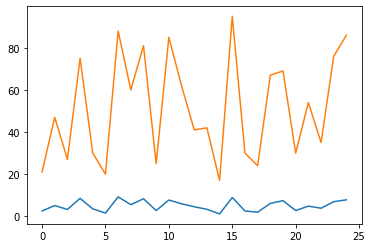

In [112]:
plt.plot(data)

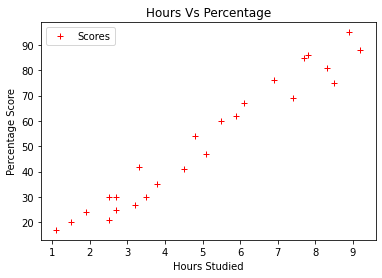

In [113]:
#plotting the data distribution
data.plot(x='Hours', y='Scores', style='r+')  
plt.title('Hours Vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

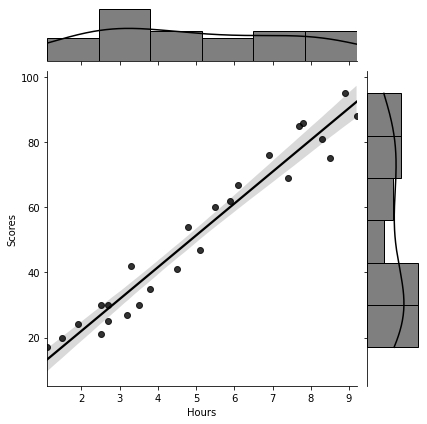

In [114]:
sns.jointplot(x='Hours',y='Scores',data=data,kind='reg',color='black')

#6. Preparing data for training

In [115]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values


#7. Splitting data into train and test dataset

In [116]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

#8. Training the dataset using regression model

In [117]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#9. Plotting the regression line

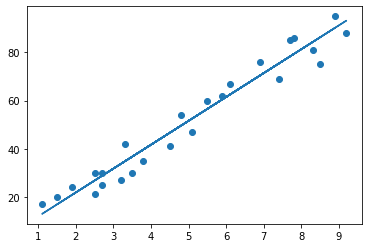

In [118]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y,)
plt.plot(X, line);
plt.show()

#10. Predicting the test model

In [119]:
y_pred = reg.predict(X_test) # Predicting the scores

#11. Comparing Actual Vs Predicted

In [120]:
test_data= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
test_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#12. Checking the model for a random value 

In [121]:
Hours = np.array([[6]])
predict=reg.predict(Hours)
if(predict>100):
  predict=100
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict))

No of Hours = [[6]]
Predicted Score = [61.48209893]


#13. Model Metrics evaluation

In [123]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test,y_pred))
print('Explained Variance Score:',explained_variance_score(y_test, y_pred, multioutput='raw_values'))
print('Max Error:',max_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002982
Coefficient of determination: 0.95
Explained Variance Score: [0.94828292]
Max Error: 6.732260779489835
